In [95]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
data1 = pd.read_csv(mouse_drug_data_to_load)
data2 = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
same_variable=[c for c in data1.columns if c in data2.columns][0]


merged=data1.join(data2.set_index(same_variable), on=same_variable).reset_index()
merged=merged.drop('index',axis=1)

# Display the data table for preview
merged


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [96]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df1=merged.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
mean_df=df1.drop("Metastatic Sites", axis=1).reset_index()
# Preview DataFrame
mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [22]:

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combined_sem = merged.groupby(["Drug","Timepoint"]).sem()

combined_sem= combined_sem.drop("Metastatic Sites", axis=1).reset_index()
combined_sem= combined_sem.drop("Mouse ID", axis=1).reset_index()

# Convert to DataFrame
tumor_sem_df = pd.DataFrame(combined_sem)

# Preview DataFrame 
tumor_sem_df.head()


,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,Capomulin,0,0.000000
1,1,Capomulin,5,0.448593
2,2,Capomulin,10,0.702684
3,3,Capomulin,15,0.838617
4,4,Capomulin,20,0.909731


In [39]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table = mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table.head()
# Preview that Reformatting worked


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [45]:
four_drugs = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
four_drugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


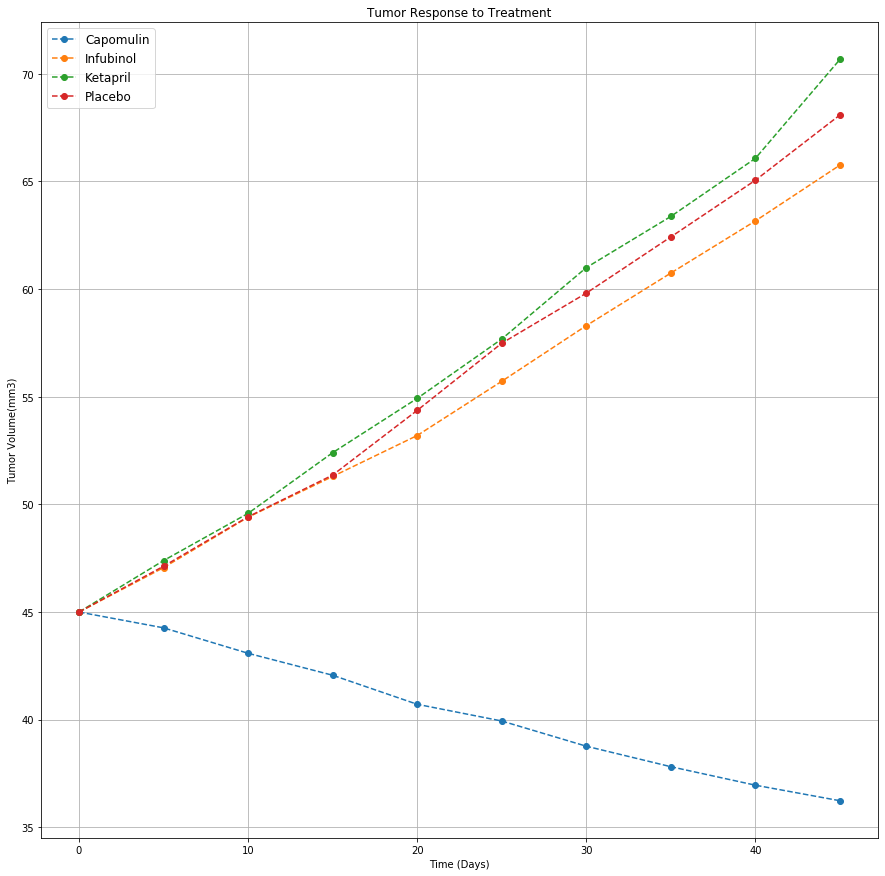

In [99]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15, 15))

#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);

plt.errorbar(x=four_drugs['Timepoint'],y=four_drugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=four_drugs['Timepoint'],y=four_drugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=four_drugs['Timepoint'],y=four_drugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=four_drugs['Timepoint'],y=four_drugs['Placebo'], yerr=None, linestyle="--", fmt='o')

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.grid()
plt.legend(("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)    
plt.savefig("plot1.png")
plt.show()



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [84]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df2=merged.groupby(['Drug', 'Timepoint']).mean()


mean_met_df = df2.drop("Tumor Volume (mm3)", axis=1).reset_index()

mean_met_df.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [85]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

combined_sem = merged.groupby(["Drug","Timepoint"]).sem()

combined_sem = combined_sem.drop("Tumor Volume (mm3)", axis=1).reset_index()
combined_sem = combined_sem.drop("Mouse ID", axis=1).reset_index()

# Convert to DataFrame
met_sem_df = pd.DataFrame(combined_sem)

# Preview DataFrame 
met_sem_df.head()

# Convert to DataFrame

# Preview DataFrame


,index,Drug,Timepoint,Metastatic Sites
0,0,Capomulin,0,0.000000
1,1,Capomulin,5,0.074833
2,2,Capomulin,10,0.125433
3,3,Capomulin,15,0.132048
4,4,Capomulin,20,0.161621


In [91]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
pivot_table_met = mean_met_df.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [89]:

met_table_fourdrugs = pivot_table_met[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
met_table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


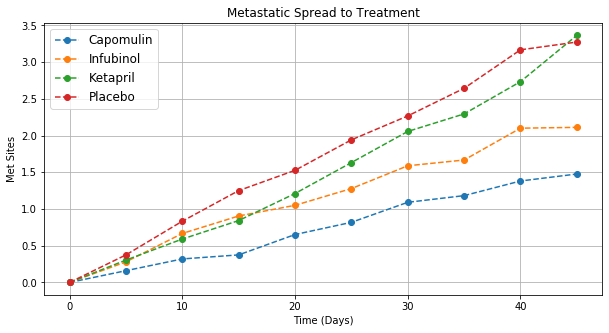

In [136]:
plt.figure(figsize = (10, 5))

plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Placebo'], yerr=None, linestyle="--", fmt='o')

plt.ylabel("Met Sites")
plt.xlabel('Time (Days)')
plt.title('Metastatic Spread to Treatment')
plt.grid()
plt.legend(("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.savefig("MetSiteResponse.png")
plt.show()

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [121]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount = merged.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
mice_df = pd.DataFrame(micecount["Mouse ID"])
mice_df.reset_index(inplace=True)

#Display dataframe
mice_df.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [130]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
pivot_table_mice = mice_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
pivot_table_mice.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table_mice.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [126]:
mice_fourdrugs = pivot_table_mice[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
mice_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19


In [135]:
mice_survival_df = mice_fourdrugs.astype(float)

mice_survival_df["Capomulin%"]=mice_survival_df["Capomulin"]/mice_survival_df["Capomulin"].iloc[0] * 100
mice_survival_df["Infubinol%"]=mice_survival_df["Infubinol"]/mice_survival_df["Infubinol"].iloc[0] * 100
mice_survival_df["Ketapril%"]=mice_survival_df["Ketapril"]/mice_survival_df["Ketapril"].iloc[0] * 100
mice_survival_df["Placebo%"]=mice_survival_df["Placebo"]/mice_survival_df["Placebo"].iloc[0] * 100

mice_survival_df.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin%,Infubinol%,Ketapril%,Placebo%
0,0.0,25.0,25.0,25.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,25.0,23.0,24.0,100.0,100.0,92.0,96.0
2,10.0,25.0,21.0,22.0,24.0,100.0,84.0,88.0,96.0
3,15.0,24.0,21.0,19.0,20.0,96.0,84.0,76.0,80.0
4,20.0,23.0,20.0,19.0,19.0,92.0,80.0,76.0,76.0


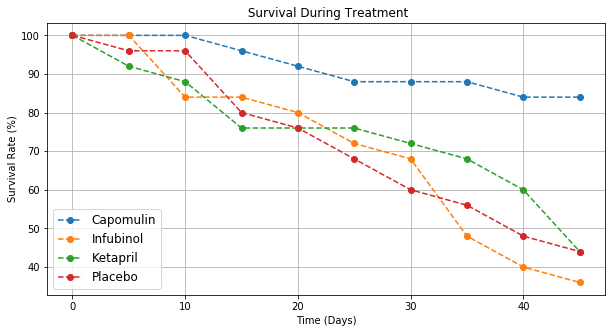

<Figure size 432x288 with 0 Axes>

In [138]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (10, 5))


plt.errorbar(x=mice_survival_df ['Timepoint'],y=mice_survival_df['Capomulin%'], linestyle="--", fmt='o')
plt.errorbar(x=mice_survival_df['Timepoint'],y=mice_survival_df['Infubinol%'], linestyle="--", fmt='o')
plt.errorbar(x=mice_survival_df['Timepoint'],y=mice_survival_df['Ketapril%'], linestyle="--",fmt='o')
plt.errorbar(x=mice_survival_df['Timepoint'],y=mice_survival_df['Placebo%'], linestyle="--", fmt='o')

plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title(' Survival During Treatment')
plt.grid()
plt.legend(("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)      
plt.show()
# Save the Figure
plt.savefig("Survival.png")
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [141]:
avg_tumor_df = mean_df.drop(['Timepoint'], axis=1)
drug_grouped_df = avg_tumor_df.groupby(['Drug'])

percentChanges = (drug_grouped_df['Tumor Volume (mm3)'].last() - drug_grouped_df['Tumor Volume (mm3)'].first()) / drug_grouped_df['Tumor Volume (mm3)'].first() * 100
percentChanges

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

NameError: name 'fig' is not defined

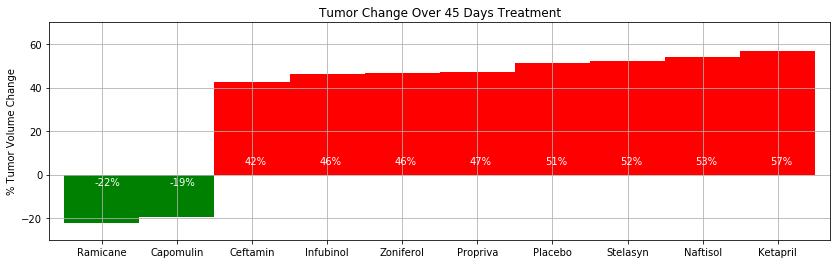

In [143]:
percentChanges = percentChanges.sort_values(ascending=True)

# Splice the data between passing and failing drugs
failingDrug_s = percentChanges[percentChanges < 0].sort_values(ascending=True)
passingDrug_s = percentChanges[percentChanges >= 0].sort_values(ascending=True)

# Use functions to label the percentages of changes
plt.figure(figsize=(14,4))
# Call functions to implement the function calls
neg_ax = plt.bar(failingDrug_s.index.values, failingDrug_s.values, color='g', width=1)
pos_ax = plt.bar(passingDrug_s.index.values, passingDrug_s.values, color='r', width=1)

# Add labels
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.7,len(percentChanges)-0.3)
plt.ylim(-30,70)
plt.grid()

# For each bar: Place a label % for negative
neg_rects = neg_ax.patches
for rect in neg_rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value)) + '%'
    plt.text(x_value-0.1, -5, percentY, color='w')

# For each bar: Place a label % for positive
pos_rects = pos_ax.patches
for rect in pos_rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value)) + '%'
    plt.text(x_value-0.1, 5, percentY, color='w')

# Save the Figure
plt.savefig("Tumor_Change_Over_45_Days_Treatment.png")

# Show the Figure
fig.show()
